# Classification (분류)
___
## K-Nearest Neighbor 🗳
머신 러닝 모델 중 가장 직관적이고 간단한 지도학습 분류 모델 <br>
다수결의 원칙과 매우 유사
- 유사성 척도(거리함수) 기반 분류 방법 <br>
✔️ Euclidean distance = $\sqrt{\displaystyle\sum_{i=1}^{k} (x_i - y_i)^2}$

### 알고리즘 
1. 학습데이터가 주어짐 : 클래스(카테고리)별로 저장 
2. 분류할 새로운 데이터가 들어옴 (Train)<br>
  1) 입력 데이터와 '가장 가까운' <span style= 'color:red'>k개의 (학습)데이터</span>를 찾음 <br>
  2) K개의 점이 속한 그룹 중에서 데이터가 <u>가장 많은 그룹</u>을 입력데이터의 그룹으로 정함 (k는 항상 홀수!!) 


### 데이터 정규화 변환 
✔️ **Minmax Scaling** : 가장 큰 값은 1, 가장 작은 값은 0
- 각 feature의 범위가 다르면 범위가 작은 feature1 보다 범위가 큰 feature 2가 값을 예측하는데 더 많은 영향을 준다. 
- 이를 피하기 위해서는, **데이터 정규화**가 필요하다 




In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

### 데이터로 실습하기

In [2]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['species'] = pd.Series(iris.target)
df.head()

# df.describe()를 통해서 각 데이터의 특성 혹은 통계값을 확인해야한다
# 필요시 정규화도 진행 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


* 데이터 확인하기

In [5]:
def setcolor(value):
  color = [ ]
  colors= ['r', 'g', 'b']
  for i in value.values:
    color.append(colors[i])
  return color

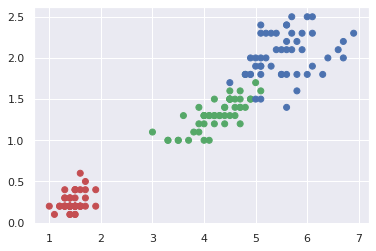

In [6]:
# species 별로 다른 색의 점으로 표기 
plt.scatter(x=df['petal length (cm)'], y=df['petal width (cm)'],
            color =setcolor(df['species']))

* Iris 모델 적용하기 
  -  kNN = 3 으로 kNN 알고리즘 학습하기

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# kNN = 3 으로 학습하기 
column_train = ['petal length (cm)', 'petal width (cm)']
neigh_3 = KNeighborsClassifier(n_neighbors =3,  weights ='distance')

In [11]:
# 학습
neigh_3_train = neigh_3.fit(df[column_train], df['species'])

* 학습한 결과를 새로운 점에 적용해 예측하기

In [12]:
new_data = np.array([2.5, 0.8]).reshape(1,-1)
new_data

array([[2.5, 0.8]])

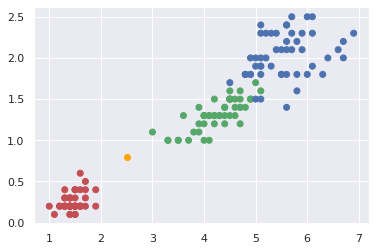

In [13]:
# 학습 자료 출력 
plt.scatter(x=df['petal length (cm)'], y=df['petal width (cm)'],
            color =setcolor(df['species']))

# 새 자료의 위치 출력 
plt.scatter(x=new_data[0,0], y=new_data[0,1], color='orange')

In [14]:
# class 예측하기 
neigh_3_class = neigh_3_train.predict(new_data)
print(neigh_3_class)

[1]


* 새로운 데이터 적용하기

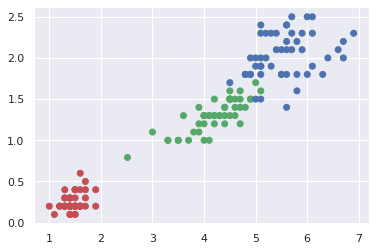

In [16]:
# 학습 자료 출력 
plt.scatter(x=df['petal length (cm)'], y=df['petal width (cm)'],
            color =setcolor(df['species']))

# 새 자료의 위치 출력 
c3 = pd.DataFrame(np.array(neigh_3_class), columns=['c'])
col3 = c3['c']
plt.scatter(x=new_data[0,0], y=new_data[0,1], color=setcolor(col3))

* Iris 모델 적용하기 
  -  kNN = 7 으로 kNN 알고리즘 학습하기

In [25]:
column_train = ['petal length (cm)', 'petal width (cm)']
neigh_7 = KNeighborsClassifier(n_neighbors =7,  weights ='distance')

In [26]:
neigh_7_train = neigh_7.fit(df[column_train], df['species'])

In [30]:
neigh_7_class = neigh_7_train.predict(new_data)
print(neigh_7_class)

[0]


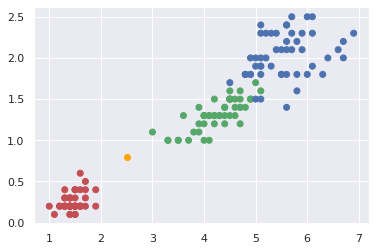

In [28]:
plt.scatter(x=df['petal length (cm)'], y=df['petal width (cm)'],
            color =setcolor(df['species']))
# 새 자료의 위치 출력 
plt.scatter(x=new_data[0,0], y=new_data[0,1], color='orange')

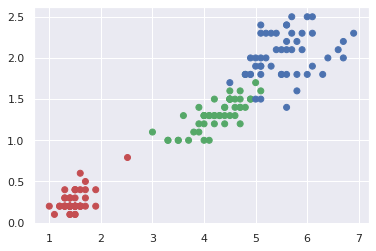

In [29]:
# 학습 자료 출력 
plt.scatter(x=df['petal length (cm)'], y=df['petal width (cm)'],
            color =setcolor(df['species']))

# 새 자료의 위치 출력 
c7 = pd.DataFrame(np.array(neigh_7_class), columns=['c'])
col7 = c7['c']
plt.scatter(x=new_data[0,0], y=new_data[0,1], color=setcolor(col7))

* n_neighbor 모델의 accuracy 평가하기

In [31]:
# Data를 train, test로 나눠서 정확도 확인하기 (1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df[column_train],
                                                    df['species'], test_size=0.33)

In [35]:
# n_neighbor= 3 으로 학습시키기 
neigh3 = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [36]:
# 학습시킨 모델의 정확도 테스트 

print('--------- 3개의 이웃 데이터 ----------')
print(classification_report(y_test, neigh3.predict(X_test)))

--------- 3개의 이웃 데이터 ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.87      0.91      0.89        22
           2       0.88      0.82      0.85        17

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.90      0.90      0.90        50

